<a href="https://colab.research.google.com/github/ammarshibani/data-analysis-colab/blob/main/Logistic_Regression_for_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries and Load the Dataset

In [ ]:
# Step 1: Importing Libraries and Loading the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
# Load dataset
df = pd.read_csv("cr_loan2.csv")
# Preview the dataset
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Step 2: Data Preprocessing

In [ ]:
# Step 2: Data Preprocessing
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])
# Fill missing interest rates with median
if 'loan_int_rate' in df.columns:
    df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
# Drop rows with other missing values (if any)
df.dropna(inplace=True)
# Remove outliers
if 'applicant_income' in df.columns:
    df = df[df['applicant_income'] < df['applicant_income'].quantile(0.99)]
df.describe()


Missing values per column:
 person_emp_length     895
loan_int_rate        3116
dtype: int64


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,11.035070,0.215426,0.169612,5.809316
std,6.360283,6.242729e+04,4.142630,6336.226458,3.070152,0.411124,0.106297,4.060867
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939700e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Step 3: Feature Engineering and Train-Test Split

In [ ]:
# Step 3: Splitting the Data into Training and Testing Sets
# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)
# Define features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((25348, 22), (6338, 22))

### Step 4: Train Logistic Regression Model

In [ ]:
# Step 4: Model Training - Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Step 5: Evaluate the Model

In [ ]:
# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.784316819185863

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      4991
           1       0.50      0.76      0.60      1347

    accuracy                           0.78      6338
   macro avg       0.71      0.78      0.73      6338
weighted avg       0.83      0.78      0.80      6338


Confusion Matrix:
 [[3942 1049]
 [ 318 1029]]


### Step 6: Data Visualization Visualization

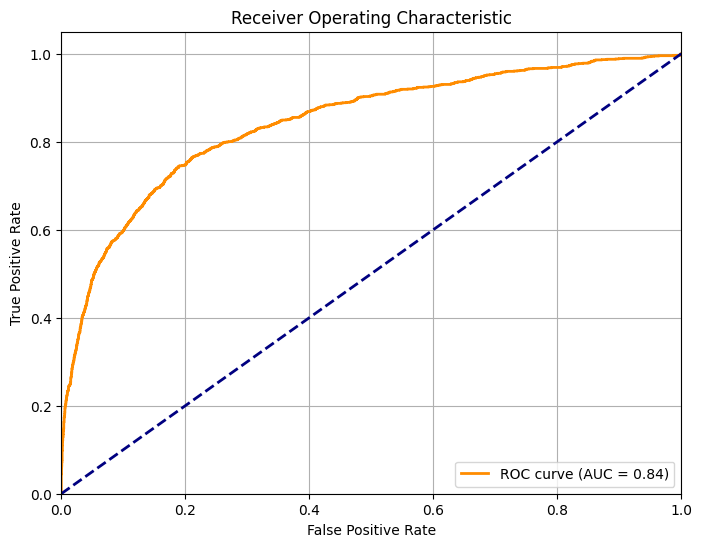

In [ ]:
# Step 6: Data Visualization Visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

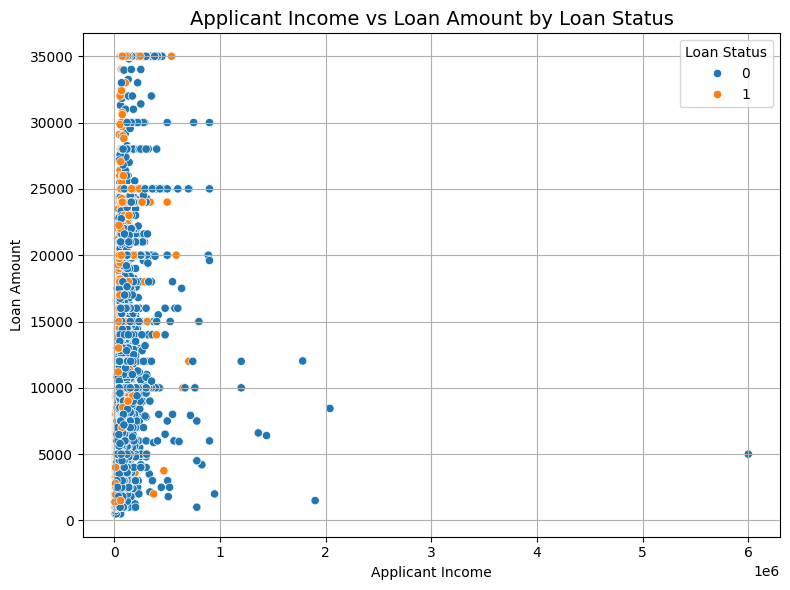

In [ ]:
# Scatter Plot - Applicant Income vs Loan Amount by Loan Status
plt.figure(figsize=(8, 6))
# Create the scatter plot
sns.scatterplot(
    data=df,
    x='person_income',
    y='loan_amnt',
    hue='loan_status',
)
# Customize the plot
plt.title("Applicant Income vs Loan Amount by Loan Status", fontsize=14)
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Status")
plt.grid(True)
plt.tight_layout()
plt.show()